In [1]:
# Toggle on-off code text  
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Click to toggle on/off the raw code.">
</form>''')

# <font color='#08843D'>Food and Food Products Related Incidents</font>
### <font color='#08843D'>*U.S. FDA 2019-2021*</font>


By: Aluyen, Jan Christian and Andam, Jhun Brian

# <font color='#08843D'>Executive Summary</font>

<div style="text-align: justify">The Food and Drug Administration is responsible for guaranteeing the safety, effectiveness, and security of human and veterinary pharmaceuticals, biological products, and medical devices, as well as the safety of our nation's food supply, cosmetics, and radiation-emitting goods. The FDA is also responsible for regulating the production, marketing, and distribution of tobacco products in order to preserve public health and prevent children's tobacco use.
This paper consists of a descriptive analysis of the data that was obtained from the U.S. FDA API called `OpenFDA`, the information that was gathered was the incident reports from 2019 until 2021. the data then undergoes an Exploratory Data Analysis to create insights and visualizations from it. We used methods such as aggregation to aggregate the original data frame to make a more flexible analysis. The data consists of information such as the <font color='#08843D'>industry name</font>, <font color='#08843D'>date created</font>, <font color='#08843D'>date reported</font>, <font color='#08843D'>age</font>, <font color='#08843D'>gender</font>, <font color='#08843D'>reactions</font>, and <font color='#08843D'>outcomes</font>.
For this study, we found out that vitamin/ minerals and unconventional diets are the most reported incidents. Furthermore, we consider <font color='#08843D'>outcomes</font> as an ordinal variable, we created weights for each category that was based on the OpenFDA's chronological order of outcomes, we rated them 1 being the least serious outcome and 11 as the most serious outcomes. We then found out that there is a positive correlation between the number of instances and the seriousness scores of a particular.</div>

# <font color='#08843D'>Introduction</font>

<div style="text-align: justify"> The Food and Drug Administration is in charge of ensuring the safety, efficacy, and security of human and veterinary medications, biological products, and medical devices, as well as the safety of our country's food supply, cosmetics, and radioactive material items. To protect the public health and reduce tobacco use among children, the FDA regulates the manufacturing, marketing, and distribution of tobacco products.
    FDA is responsible for advancing public health by assisting in the development of medical products that are more effective, safer, and affordable, as well as assisting the public in obtaining accurate, science-based information on how to use medical products and foods to maintain and improve their health.
    FDA also contributes significantly to the country's counter-terrorism capabilities. FDA carries out this duty by ensuring the safety of the food supply and encouraging the development of medical goods to combat both purposeful and natural public health concerns.</div>

# <font color='#08843D'>Objective and Metrics</font>

<div style="text-align: justify">This paper aims to explore the data and information that was gathered through an API that was provided by the U.S. FDA, Food and Food products which also include cosmetics and external usage products are included in this paper.
Our aim for this study is to obtain insights about issues that are being reported by the Food and Drug Administration for the people and us to be wary about the products that we are buying and to be aware of the products that are already been involved.
We use a metrics that we called the <font color='#08843D'>seriousness_score</font> this score defines the seriousness of an outcome, another outcome being the least serious and death being the most serious, the scale was then normalized in scoring of 1 to 100.</div>

# <font color='#08843D'>Scope and Problem Statements</font>

The information that we requested from the API ranges from 2019 up until 2021. 
We would hope to answer the following questions;
* Are serious cases being reported directly?
* What products have the most reported incidents?
* What brands have already been involved in an incident?
* What are the most common outcomes for a particular product?
* What are the most common adverse effects of a particular product?

# <font color='#08843D'>Methodology</font>
<img src='methodology.png'>

**Data Collection and Wrangling**

In [1]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [8]:
sns.set(rc={'figure.figsize':(10,5)})

with open('api-key.txt', 'r') as f:
    key = f.read()

In [3]:
# Session Initialization
session = requests.Session()

endpoint = "https://api.fda.gov/food/event.json?"
limit = 1000
query = f"{endpoint}api_key={key}&search=_exists_:consumer.age+AND+date_started:[2019-01-01+TO+2021-01-01]+AND+consumer.gender:(M+OR+F)&limit={limit}"

try:
    request = session.get(query)

    print(request.reason)
    data = request.json()
except ConnectionError as f:
    print(f)

OK


In [4]:
raw = {
    'report_number':[],
    'outcomes':[],
    'date_created':[],
    'reactions':[],
    'date_started':[],
    'consumer':[],
    'products':[]
}
for info in data['results']:
    for k, v in raw.items():
        v.append(info[k])

**DataFrame**

In [5]:
raw_df = pd.DataFrame(raw)
raw_df.head()

for dates in raw_df[['date_created', 'date_started']]:
    raw_df[dates] = pd.to_datetime(raw_df[dates])

raw_df['age'] = [a['age'] for a in raw_df['consumer']]
raw_df['gender'] = [b['gender'] for b in raw_df['consumer']]
raw_df['name_brand'] = [c[0]['name_brand'] for c in raw_df['products']]
raw_df['industry_code'] = [d[0]['industry_code'] for d in raw_df['products']]
raw_df['industry_name'] = [e[0]['industry_name'] for e in raw_df['products']]
raw_df['num_of_days_until_reported'] = raw_df['date_created'] - raw_df['date_started']

raw_df['num_of_days_until_reported'] = raw_df['num_of_days_until_reported'].dt.days.astype('int16')
raw_df['age'] = raw_df['age'].astype('float64')
raw_df.drop(['consumer', 'products'], axis=1, inplace=True)

final_df = raw_df

# <font color='#08843D'>Exploratory Data Analysis</font>

In [6]:
# For horizontal bar graphs
def make_horizontal_bars(column, title, xlabel, ylabel, head=-1):
    x = column.value_counts().head(head).values
    y = column.value_counts().head(head).index
    ax = sns.barplot(x=x, y=y, palette='mako_r')
    ax.bar_label(container=ax.containers[0], labels=x)
    plt.title(title, fontweight='bold', fontsize=15)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

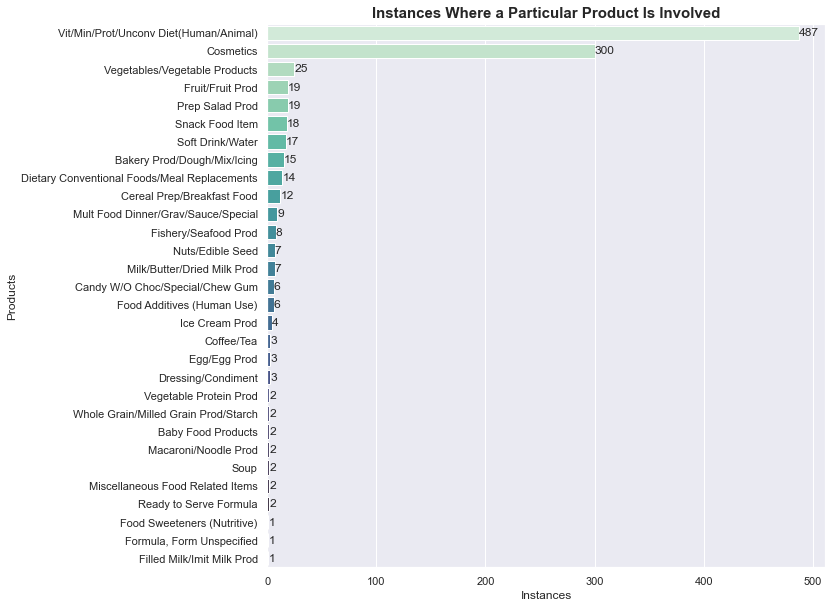

In [9]:
plt.figure(figsize=(10,10))
make_horizontal_bars(final_df['industry_name'], 
                     "Instances Where a Particular Product Is Involved", 
                     "Instances", 
                     "Products")

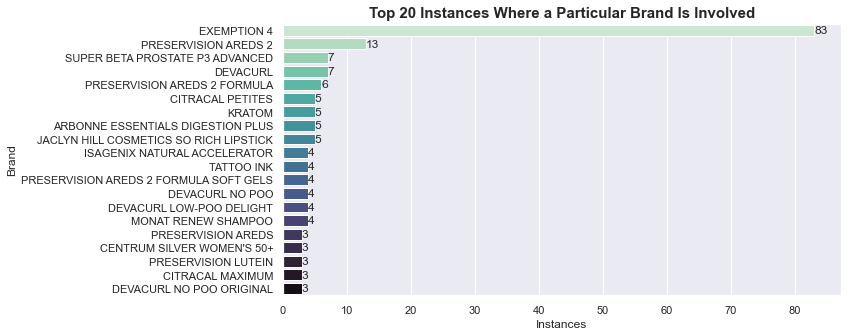

In [10]:
head = 20
make_horizontal_bars(final_df['name_brand'], 
                     f"Top {head} Instances Where a Particular Brand Is Involved", 
                     "Instances", 
                     "Brand", 
                     head=head)

<font color='#08843D'>**Exemption 4**</font>

<div style="text-align: justify">Exemption 4 of the FOIA protects "trade secrets and commercial or financial information obtained from a person privileged or confidential." This exemption is intended to protect the interests of both the government and submitters of information.</div>

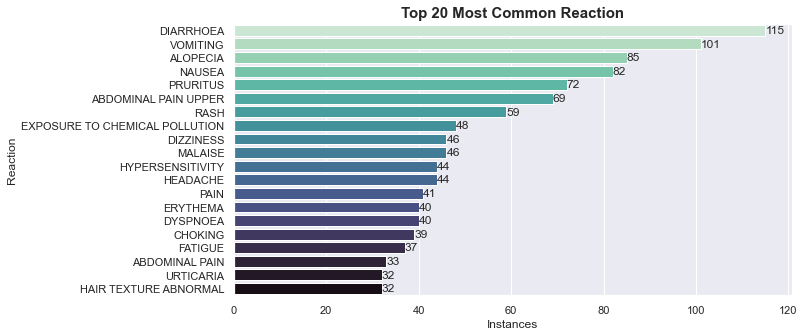

In [11]:
reacciones = []
for reaction in final_df['reactions']:
    for disease in reaction:
        reacciones.append(disease)
        
reaction_df = pd.DataFrame(pd.Series(reacciones))
head = 20
make_horizontal_bars(reaction_df[0], 
                     f"Top {head} Most Common Reaction", 
                     "Instances", 
                     "Reaction", 
                     head=head)

<a id='gender_age'></a>

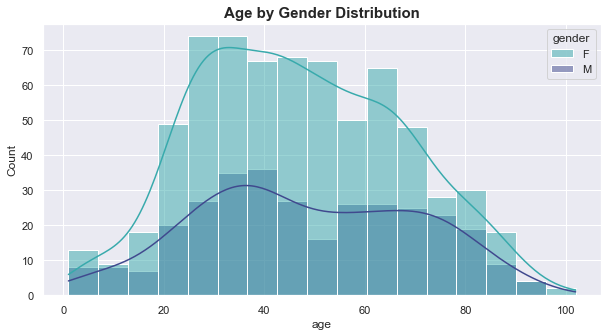

In [12]:
sns.histplot(x=final_df['age'], kde=True, palette='mako_r', hue=final_df['gender'])
plt.title("Age by Gender Distribution", fontsize=15, fontweight='bold');

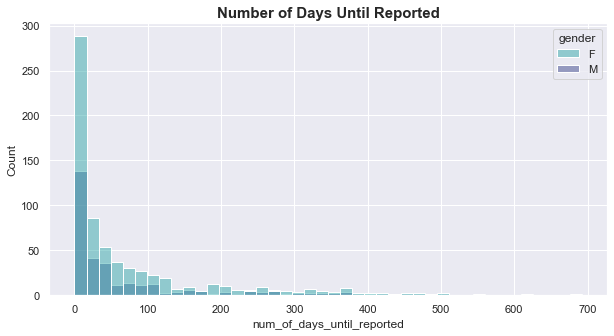

In [24]:
sns.histplot(x=final_df[final_df.num_of_days_until_reported >= 0]['num_of_days_until_reported'], palette='mako_r', hue=final_df['gender'])
plt.title("Number of Days Until Reported", fontsize=15, fontweight='bold');

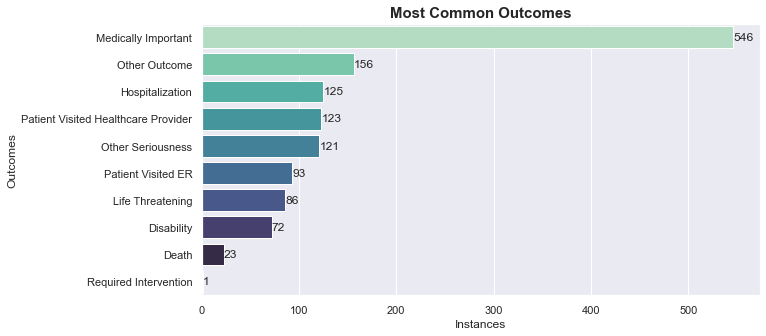

In [25]:
resultados = []
for out in final_df['outcomes']:
    for outcome in out:
        resultados.append(outcome)
        
outcomes_df = pd.DataFrame(pd.Series(resultados))
make_horizontal_bars(outcomes_df[0], f"Most Common Outcomes", "Instances", "Outcomes")

<font color='#08843D'>**Level of Seriousness**</font>
* Other Outcome: The outcome was not one of the specified types.
* Patient Visited Healthcare Provider: The adverse event was serious enough to cause the consumer to visit a health care provider.
* `Patient Visited ER`: The consumer visited an ER.
* `Required Intervention`: The adverse event caused an illness or injury serious enough to require intervention to prevent permanent impairment or disability.
* `DISABILITY`: The adverse event caused the permanent disability.
* `CONGENITAL ANOMALY`: The adverse event caused a birth defect in a baby.
* `Medically Important`: The outcome included non-specified serious medical.
* `OTHER SERIOUSNESS`: The outcome included non-specified serious medical events.
* `HOSPITALIZATION`: The consumer was hospitalized.
* `LIFE THREATENING`: The adverse event was life threatening.
* `DEATH`: The adverse event was the death of the consumer.

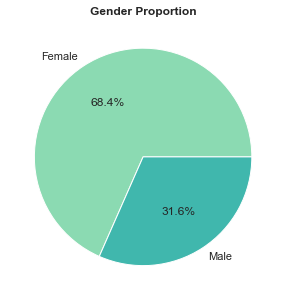

In [26]:
colors = sns.color_palette('mako_r')[0:2]
plt.pie(x=final_df['gender'].value_counts().values, labels=['Female', 'Male'], colors=colors, autopct="%.1f%%")
plt.title("Gender Proportion", fontweight='bold')
plt.show()

<font color='#08843D'>**Aggregation**</font>

In [27]:
grouped_df = final_df[['industry_code',
                       'industry_name',
                       'outcomes', 
                       'reactions', 
                       'age',
                       'gender',
                       'name_brand', 
                       'num_of_days_until_reported']].groupby(['industry_name', 
                                                               'industry_code'], as_index=False).agg({'outcomes':'sum',                                  
                                                                                                    'reactions':'sum',
                                                                                                    'age':lambda b: list(b),
                                                                                                    'gender': lambda c: list(c),
                                                                                                    'name_brand': lambda d:list(d), 
                                                                                                    'num_of_days_until_reported': lambda e:list(e)})
grouped_df['num_instances'] = [len(a) for a in grouped_df['age']]
grouped_df = grouped_df.sort_values('num_instances', ascending=False).reset_index().drop('index', axis=1)
grouped_df.head()

,industry_name,industry_code,outcomes,reactions,age,gender,name_brand,num_of_days_until_reported,num_instances
0,Vit/Min/Prot/Unconv Diet(Human/Animal),54,"[Other Seriousness, Death, Hospitalization, Me...","[RASH, CONVULSION, CARDIO-RESPIRATORY ARREST, ...","[63.0, 39.0, 76.0, 48.0, 35.0, 24.0, 43.0, 68....","[F, M, F, M, F, F, F, M, F, F, M, M, M, M, F, ...",[CVS HEALTH PROBIOTIC DIETARY SUPPLEMENT ADULT...,"[84, 16, 185, 9, 56, 50, 130, 30, 106, 86, 44,...",487
1,Cosmetics,53,"[Hospitalization, Other Outcome, Patient Visit...","[SKIN DISORDER, RASH, ERYTHEMA, ACNE, COUGH, D...","[32.0, 22.9, 38.0, 28.0, 39.0, 22.0, 57.0, 54....","[F, F, F, F, M, F, F, F, F, M, M, F, F, F, F, ...","[EXEMPTION 4, MORPHE JAMES CHARLES PALETTE, MA...","[18, 0, 6, 57, 42, 15, 105, 128, 2, 88, 81, 58...",300
2,Prep Salad Prod,39,"[Medically Important, Medically Important, Oth...","[PYREXIA, CHILLS, DIARRHOEA, ABDOMINAL PAIN UP...","[42.0, 27.0, 61.0, 51.0, 49.0, 40.0, 43.0, 28....","[F, M, F, F, F, F, F, F, M, M, M, M, F, M, F, ...","[WEGMANS ROMAINE BAGGED LETTUCE, LITTLE SALAD ...","[8, 3, 1, 2, 14, 12, 13, 2, 19, 13, 7, 3, 2, 4...",19
3,Snack Food Item,7,"[Medically Important, Hospitalization, Medical...","[DIARRHOEA, SCAR, MALAISE, GASTROINTESTINAL DI...","[39.0, 10.0, 4.4, 47.0, 64.1, 74.0, 76.0, 24.0...","[F, M, M, F, F, M, M, F, F, M, F, M, F, F, M, ...","[DORITOS NACHO CHEESE, FLAMING HOT CHEETOS, CH...","[6, 1, 3, 1, 8, 35, 4, 3, 0, 0, 8, 3, 2, 2, 4,...",18
4,Soft Drink/Water,29,"[Other Seriousness, Medically Important, Disab...","[TREMOR, SWOLLEN TONGUE, NAUSEA, PARAESTHESIA,...","[25.0, 44.0, 25.6, 44.0, 44.0, 5.8, 70.0, 65.0...","[F, F, F, F, F, M, F, M, F, F, M, M, F, F, F, ...","[GATORADE FLOW TIDAL PUNCH, LA CROIX COCONUT, ...","[1, 1, 4, 10, 1, 3, 0, 4, 35, 4, 4, 1, 3, 8, 3...",17


In [29]:
l = []
for i in final_df['outcomes']:
    for j in i:
        l.append(j)
unique_outcomes = np.unique(l)

for u in unique_outcomes:
    grouped_df[u] = [i.count(u) for i in grouped_df['outcomes']]
    
grouped_df['age_mode'] = [pd.Series(grouped_df['age'][i]).value_counts().sort_values(ascending=False).head(1).index[0] for i in range(len(grouped_df['age']))]
grouped_df['num_of_days_until_reported_mode'] = [pd.Series(grouped_df['num_of_days_until_reported'][i]).value_counts().sort_values(ascending=False).head(1).index[0] for i in range(len(grouped_df['num_of_days_until_reported']))]
grouped_df['female_count'] = [Counter(i)['F'] for i in grouped_df['gender']]
grouped_df['male_count'] = [Counter(i)['M'] for i in grouped_df['gender']]

grouped_df.drop(['outcomes', 'age', 'gender', 'num_of_days_until_reported'], axis=1, inplace=True)

<font color='#08843D'>**Putting some weights for ordinal data**</font>

Weights are based on the OpenFDA's chronological order of outcomes.

In [32]:
scale = {
    'Other Outcome':1,
    'Patient Visited Healthcare Provider':2,
    'Patient Visited ER':3,
    'Required Intervention':4,
    'Disability':5,
    'Congenital Anomaly':6,
    'Medically Important':7,
    'Other Seriousness':8,
    'Hospitalization':9,
    'Life Threatening':10,
    'Death':11
}

outcomes = grouped_df[unique_outcomes]
outcomes = outcomes.reindex(columns=scale.keys())
outcomes.index = grouped_df['industry_name']

In [33]:
outcomes_copy = outcomes.copy()
for i in outcomes_copy:
    outcomes_copy[i] = [list(outcomes[k] * v) for k,v in scale.items()][outcomes.columns.get_loc(i)]

In [35]:
# To normalize scales
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)    
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

arr = outcomes_copy.sum(axis=1).tolist()
product_score = normalize(arr, 0, 1)

In [36]:
outcomes['score'] = list(pd.Series(product_score) * 100)
outcomes['num_day_until_reported'] = grouped_df['num_of_days_until_reported_mode'].values
outcomes['num_instances'] = grouped_df['num_instances'].values

### <font color='#08843D'>Are serious cases being reported directly?</font>

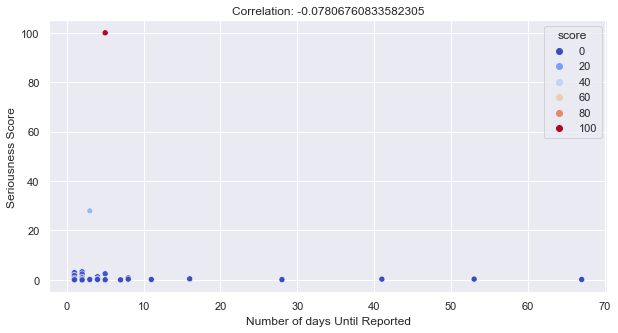

In [37]:
sns.scatterplot(data=outcomes, x='num_day_until_reported', y='score', hue='score', palette='coolwarm')
plt.xlabel("Number of days Until Reported")
plt.ylabel("Seriousness Score")
plt.title(f"Correlation: {outcomes['num_day_until_reported'].corr(outcomes['score'])}");

### <font color='#08843D'>What are the instances based on seriousness score?</font>

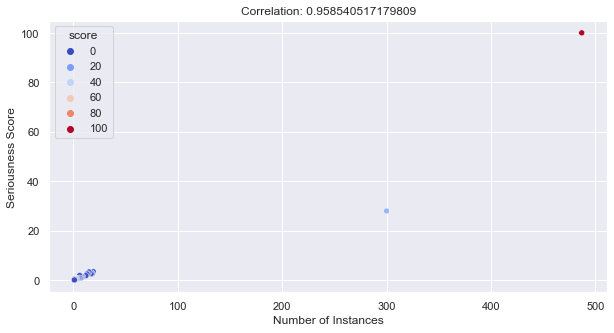

In [38]:
sns.scatterplot(data=outcomes, x='num_instances', y='score',palette='coolwarm', hue='score')
plt.xlabel("Number of Instances")
plt.ylabel("Seriousness Score")
plt.title(f"Correlation: {outcomes['num_instances'].corr(outcomes['score'])}");

### <font color='#08843D'>How serious are reactions?</font>

In [39]:
r = []
for i in grouped_df['reactions']:
    ser = pd.Series(i).value_counts()
    top = ser[0]
    tot = sum(ser)
    r.append(np.round(top/tot*100, 3))
    
outcomes['top_reactions'] = [pd.Series(i).value_counts().head(1).index[0]  for i in grouped_df['reactions']]
outcomes['proportion_of_reaction'] = r

topss = outcomes[['score','top_reactions','proportion_of_reaction']]
topss

,score,top_reactions,proportion_of_reaction
industry_name,,,
Vit/Min/Prot/Unconv Diet(Human/Animal),100.000000,NAUSEA,3.093
Cosmetics,27.918886,ALOPECIA,9.900
Prep Salad Prod,3.359279,DIARRHOEA,19.118
Snack Food Item,2.539943,VOMITING,11.538
Soft Drink/Water,2.949611,MALAISE,10.909
Vegetables/Vegetable Products,2.478492,DIARRHOEA,15.000
Bakery Prod/Dough/Mix/Icing,3.256862,NAUSEA,13.333
Dietary Conventional Foods/Meal Replacements,2.478492,VOMITING,10.000
Fruit/Fruit Prod,2.417042,VOMITING,11.321


### <font color='#08843D'>Most Common Reaction no matter the Product</font>

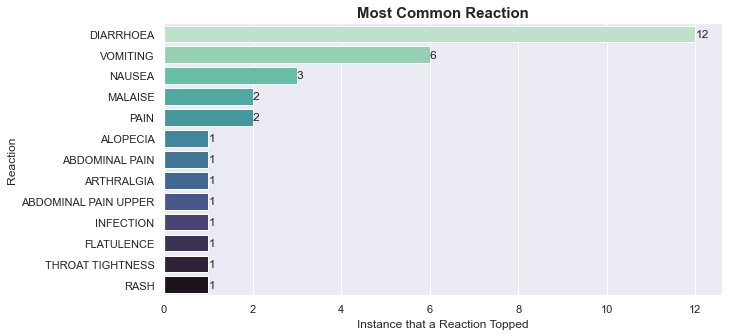

In [40]:
make_horizontal_bars(topss['top_reactions'], "Most Common Reaction", "Instance that a Reaction Topped", "Reaction")

# <font color='#08843D'>Insights and Recommendations</font>

<div style="text-align: justify">Based on the OpenFDA's available data repository that was obtained through an API, we can see that the contents are not just food and food products but the API also includes external products like cosmetics and other items. This paper shows what products have the most cases of incident reports from the year 2019 until 2021, this could help customers to be wary about the products that they are buying. Customers should always consider the products that they are buying by checking labels and brands because there are brands that have unpleasant reputations. After all, there are multiple incidents that which the said product brand was involved. In contrast, to protect the name of the businesses that might be involved, FOIA created an exemption for them to secure their reputations, therefore the disclosed brands that were mentioned in this paper are not the only brands that the consumers must be wary of.
For further studies, we recommend pulling a request from the API with a balanced class industry_name this is to make an unbiased score for the seriousness_score that we created.</div>

# <font color='#08843D'>References</font>

Open.fda.gov. (n.d.). Retrieved June 17, 2022, from https://open.fda.gov/ 

How to normalize an array in NumPy in python? GeeksforGeeks. (2021, December 8). Retrieved June 17, 2022, from https://www.geeksforgeeks.org/how-to-normalize-an-array-in-numpy-in-python/ 